# Evaluation Metrics - Homework

In this homework, we will use the Car price dataset like last week.
We will work with the MSRP variable, and we will transform it to a classification task.
For the rest of the homework, we will need to use only these columns:

* Make,
* Model,
* Year,
* Engine HP,
* Engine Cylinders,
* Transmission Type,
* Vehicle Style,
* highway MPG,
* city mpg
* MSRP

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
SEED = 1

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-10 21:58:55--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv'

     0K .......... .......... .......... .......... ..........  3% 1.25M 1s
    50K .......... .......... .......... .......... ..........  6%  481K 2s
   100K .......... .......... .......... .......... .......... 10% 32.1M 1s
   150K .......... .......... .......... .......... .......... 13% 5.07M 1s
   200K .......... .......... .......... .......... .......... 17%  475K 1s
   250K .......... .......... .......... .......... .......... 20% 29.6M 1s
   300K .......... .......... .......... .......... .......... 24% 13.0M 1s
   350K ..

In [4]:
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.shape

(11914, 16)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## Data Preparation

* Keep only the columns needed for the homework
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average

In [7]:
features = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [8]:
data = data[features]
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [9]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [10]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [11]:
data['engine_hp'] = data['engine_hp'].fillna(0)
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

In [12]:
data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [13]:
data = data.rename(columns={'msrp': 'price'})
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [14]:
data['price'].mean()

40594.737032063116

In [15]:
mean_price = data['price'].mean()
data['above_average'] = np.where(data['price'] >= mean_price, 1, 0)
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [16]:
data = data.drop(['price'], axis=1)
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


## Validation Framework

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution.

In [17]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [18]:
assert len(data) == len(df_train) + len(df_val) + len(df_test)

In [19]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the above_average variable
* Use the training dataset for that

If AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. We can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
data.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int32
dtype: object

In [24]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

for f in numerical:
    score = roc_auc_score(y_train, df_train[f])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[f])
    print(f'{f:<16} | AUC = {score}')

year             | AUC = 0.687551492804683
engine_hp        | AUC = 0.9171031265539011
engine_cylinders | AUC = 0.766116490165669
highway_mpg      | AUC = 0.6330587871772013
city_mpg         | AUC = 0.6734244643245233


engine_hp has the highest AUC.

## Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.678
* 0.779
* 0.878
* 0.979

In [25]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

assert 'above_average' not in df_train.columns
assert 'above_average' not in df_val.columns
assert 'above_average' not in df_test.columns

In [26]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train

array([[2.700e+01, 6.000e+00, 2.800e+02, ..., 0.000e+00, 0.000e+00,
        2.016e+03],
       [1.800e+01, 6.000e+00, 3.000e+02, ..., 1.000e+00, 0.000e+00,
        2.014e+03],
       [1.900e+01, 4.000e+00, 2.590e+02, ..., 1.000e+00, 0.000e+00,
        2.016e+03],
       ...,
       [3.200e+01, 4.000e+00, 1.300e+02, ..., 0.000e+00, 0.000e+00,
        2.017e+03],
       [1.600e+01, 5.000e+00, 1.620e+02, ..., 1.000e+00, 0.000e+00,
        1.991e+03],
       [1.400e+01, 6.000e+00, 2.400e+02, ..., 0.000e+00, 0.000e+00,
        2.003e+03]])

In [27]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [28]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [29]:
y_pred = model.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred), 3)

0.979

AUC of this model on the validation dataset is 0.979.

## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [30]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, tn, fp, fn))

In [31]:
columns = ['threshold', 'tp', 'tn', 'fp', 'fn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,threshold,tp,tn,fp,fn
0,0.00,654,0,1729,0
1,0.01,652,967,762,2
2,0.02,651,1096,633,3
3,0.03,651,1176,553,3
4,0.04,650,1239,490,4


In [32]:
df_scores['precision'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['recall'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

df_scores.head()

,threshold,tp,tn,fp,fn,precision,recall
0,0.00,654,0,1729,0,0.274444,1.000000
1,0.01,652,967,762,2,0.461103,0.996942
2,0.02,651,1096,633,3,0.507009,0.995413
3,0.03,651,1176,553,3,0.540698,0.995413
4,0.04,650,1239,490,4,0.570175,0.993884


Text(0, 0.5, 'Value')

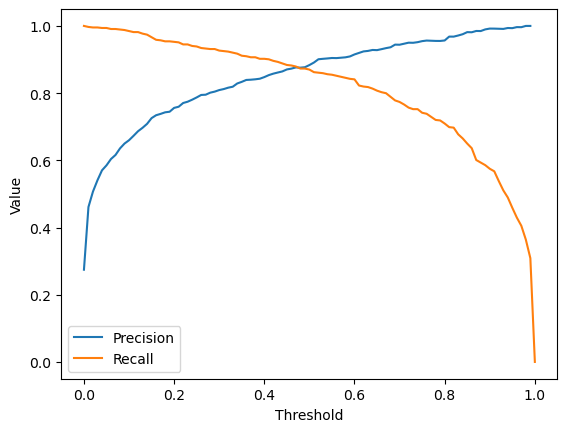

In [33]:
plt.plot(df_scores['threshold'], df_scores['precision'], label='Precision')
plt.plot(df_scores['threshold'], df_scores['recall'], label='Recall')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Value')

Precision and recall curves intersect at 0.48 threshold.

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

* 0.12
* 0.32
* 0.52
* 0.72

In [34]:
df_scores['f1'] = 2 * ((df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall']))
df_scores.head()

,threshold,tp,tn,fp,fn,precision,recall,f1
0,0.00,654,0,1729,0,0.274444,1.000000,0.430688
1,0.01,652,967,762,2,0.461103,0.996942,0.630561
2,0.02,651,1096,633,3,0.507009,0.995413,0.671827
3,0.03,651,1176,553,3,0.540698,0.995413,0.700753
4,0.04,650,1239,490,4,0.570175,0.993884,0.724638


In [35]:
max_f1 = df_scores['f1'].max()
df_scores[df_scores['f1'] == max_f1]['threshold']

52    0.52
Name: threshold, dtype: float64

F1 is maximal at 0.52 threshold.

## Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

* 0.003
* 0.030
* 0.090
* 0.140

In [36]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

In [37]:
def train(df_train, y_train, solver='liblinear', C=1.0, max_iter=1000, random_state=SEED):
    dv = DictVectorizer(sparse=False)

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver=solver, C=C, max_iter=max_iter, random_state=random_state)
    model.fit(X_train, y_train)

    return dv, model

In [38]:
def predict(df, dv, model):
    df_dict = df.to_dict(orient='records')

    X = dv.transform(df_dict)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['above_average'].values
    y_val = df_val['above_average'].values

    df_train = df_train.drop('above_average', axis=1)
    df_val = df_val.drop('above_average', axis=1)

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

np.array(scores).std().round(3)

0it [00:00, ?it/s]

0.003

Standard devidation of the scores across different folds is 0.003

## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

* 0.01
* 0.1
* 0.5
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [40]:
for C in tqdm([0.01, 0.1, 0.5, 10]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train['above_average'].values
        y_val = df_val['above_average'].values

        df_train = df_train.drop('above_average', axis=1)
        df_val = df_val.drop('above_average', axis=1)

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(f'C={C} {np.mean(scores):.3f} +- {np.std(scores):.3f}')

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.952 +- 0.002
C=0.1 0.972 +- 0.002
C=0.5 0.979 +- 0.004
C=10 0.984 +- 0.003


`C=10` leads to the best mean score.